### Heat Flow on Integer Lattices...
and the effect of graph coarsening.

In [171]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.insert(1,'/Users/jackh/Documents/FMBV_2023/gordon_original/src/') # FMBV src

import numpy as np
import StructuralFMBV
import betterspy
import matplotlib.pyplot as plt
import scipy
import random

In [172]:
n = 20

mode = 0 # MODE

if mode == 0:
    # uniform
    x = np.zeros(n, dtype=int)
if mode == 1:
    # step function
    x = np.zeros(n, dtype=int)
    x[:int(.5*n)] = 1

to_load = x[:,None,None]
sf = StructuralFMBV.StructuralFMBV(verbose=True)
sf.load_pd(to_load)

[verbose] Initialising FMBV object...
[verbose] Mode: 0
[verbose] Default memory handling.
[verbose] Loading Power Doppler...


In [173]:
L, deg = sf._get_laplacian(sig=1, eps=1, ind_sig=1, mode='default')
P = scipy.sparse.diags(deg.diagonal()**-0.5)*L*scipy.sparse.diags(deg.diagonal()**-0.5)
W = sf.W

[verbose] kd_tree...
[verbose] constructing laplacian...


  (0, 0)	0.0
  (0, 1)	0.36787944117144233
  (1, 0)	0.36787944117144233
  (1, 1)	0.0
  (1, 2)	0.36787944117144233
  (2, 1)	0.36787944117144233
  (2, 2)	0.0
  (2, 3)	0.36787944117144233
  (3, 2)	0.36787944117144233
  (3, 3)	0.0
  (3, 4)	0.36787944117144233
  (4, 3)	0.36787944117144233
  (4, 4)	0.0
  (4, 5)	0.36787944117144233
  (5, 4)	0.36787944117144233
  (5, 5)	0.0
  (5, 6)	0.36787944117144233
  (6, 5)	0.36787944117144233
  (6, 6)	0.0
  (6, 7)	0.36787944117144233
  (7, 6)	0.36787944117144233
  (7, 7)	0.0
  (7, 8)	0.36787944117144233
  (8, 7)	0.36787944117144233
  (8, 8)	0.0
  :	:
  (11, 11)	0.0
  (11, 12)	0.36787944117144233
  (12, 11)	0.36787944117144233
  (12, 12)	0.0
  (12, 13)	0.36787944117144233
  (13, 12)	0.36787944117144233
  (13, 13)	0.0
  (13, 14)	0.36787944117144233
  (14, 13)	0.36787944117144233
  (14, 14)	0.0
  (14, 15)	0.36787944117144233
  (15, 14)	0.36787944117144233
  (15, 15)	0.0
  (15, 16)	0.36787944117144233
  (16, 15)	0.36787944117144233
  (16, 16)	0.0
  (16, 17)	0.

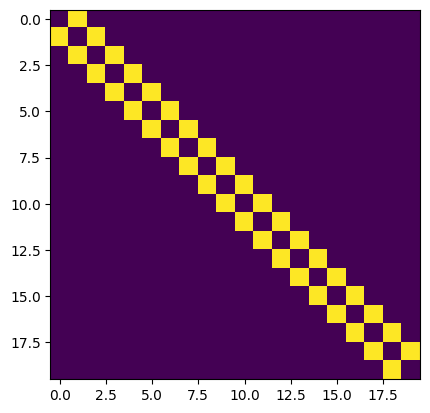

In [174]:
print(W)
betterspy.show(W, colormap="viridis")

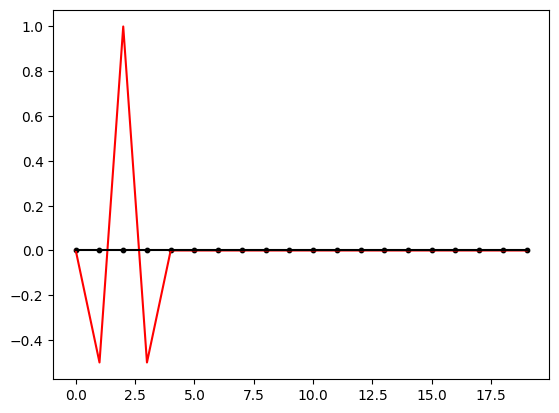

In [175]:
y = np.zeros(n)
y[2] = 1

# print(np.ones(n))

a = (P)**1*y

def plt_temp(a):
    plt.figure()
    plt.plot(a, c='r') # temperature

    plt.plot(x, c='k')
    plt.scatter(range(n),x, c='k', s=10)

plt_temp(a)

In [176]:


class RW_Graph():

    def __init__(self, W):
        self.W = W # as array.
        self._trans()
    
    def _trans(self):
        self.T = self.W / np.sum(self.W, axis = 0)

    def _step(self, ind):
        prob = self.T[:,ind]
        r = random.random()
        
        c = 0
        for i in range(len(prob)):
            c = c + prob[i]
            if r <= c:
                return i
            
    def _walk(self, start_ind, length=1):
        for i in range(length):
            start_ind = self._step(start_ind)
        return start_ind
    
    def _setup_inc_trans(self, start_ind, inc = None):
        if inc.any() == None:
            sh = W.shape
            self.inc = np.array(range(sh[0]))
        else:
            # checks...
            self.inc = inc
        
        self.state_to_ind = []
        self.uniq = []
        c = -1
        for i in self.inc:
            if not i in self.uniq:
                self.uniq.append(i)
                c = c + 1
            self.state_to_ind.append(c)

        inc_n = len(self.uniq)
        self.inc_T = np.zeros((inc_n, inc_n), dtype=int)

        self.start_ind = start_ind

    def _step_inc_trans(self):
        a = self.start_ind
        self.start_ind = self._step(self.start_ind)
        b = self.start_ind

        inc_a = self.state_to_ind[a]
        inc_b = self.state_to_ind[b]
        # print(inc_b)
        self.inc_T[inc_b,inc_a] = self.inc_T[inc_b,inc_a] + 1





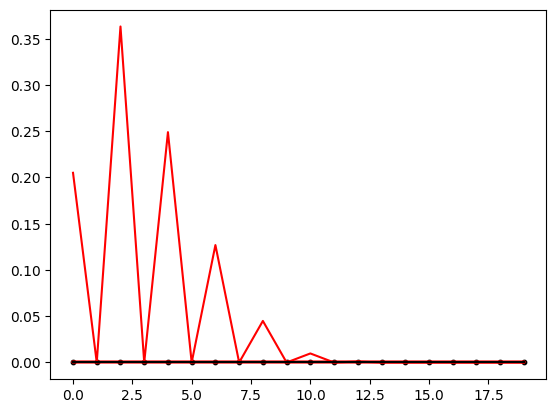

In [177]:
y2 = np.zeros(n)
y2[2] = 1

G = RW_Graph(W.toarray())
b = np.linalg.matrix_power(G.T, 10)*y2
plt_temp(b)



In [1]:
outcomes = []

N = 1000
leng = 100
for i in range(N):
    temp = G._walk(2,length=leng)
    outcomes.append(temp)

outcomes

def _h(outcomes):
    h = np.zeros(n)
    for o in outcomes:
        h[o] = h[o] + 1

    return h

h = _h(outcomes)

plt_temp(h)

NameError: name 'G' is not defined

In [179]:
inc = np.array(np.array(range(n)) >= 11, dtype=int)
# inc = np.array(range(n))
# inc = None
# inc[-2:] = 5

print(inc)

G._setup_inc_trans(5, inc=inc)

print(G.uniq)
print(G.state_to_ind)

k = 10
for i in range(k):
    G._step_inc_trans()
    
print(G.inc_T)

print(G.inc_T/np.sum(G.inc_T, axis=0))

[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
[0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[[520641  26437]
 [ 26438 426484]]
[[0.95167426 0.05837   ]
 [0.04832574 0.94163   ]]


In [180]:
# # cluster testing

# inc = np.array(np.array(range(n)) >= k, dtype=int)


In [181]:
vals, vecs = scipy.sparse.linalg.eigs(P,which='SR')

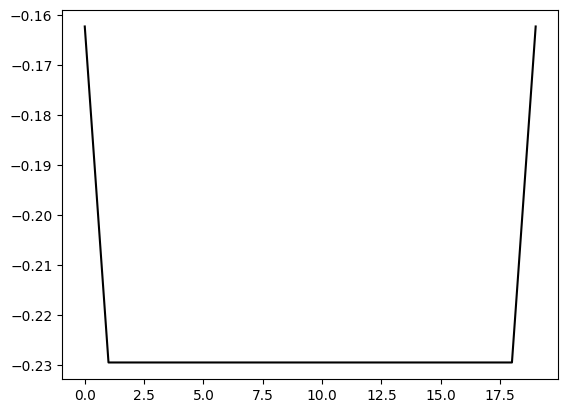

In [182]:
fig = plt.figure()
plt.plot(range(n), vecs[:,0], c='k')

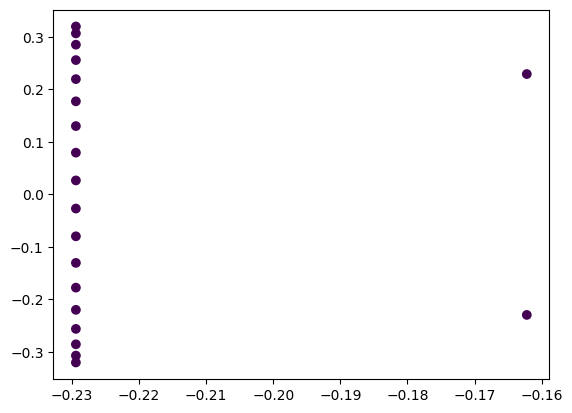

In [183]:
fig = plt.figure()
plt.scatter(vecs[:,0], vecs[:,1], c=x)